# Census Income Project


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.shape

(32560, 15)

Number of rows is 32560 and number of rows is 15

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values are present

In [9]:
# printing all data type and their unique values
for column in df.columns:
    if df[column].dtype==object:
        print(str(column)+' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('============================================')

Workclass : [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education : [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtyp

In [12]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age                0.0 %
Workclass         5.64 %
Fnlwgt             0.0 %
Education          0.0 %
Education_num      0.0 %
Marital_status     0.0 %
Occupation        5.66 %
Relationship       0.0 %
Race               0.0 %
Sex                0.0 %
Capital_gain       0.0 %
Capital_loss       0.0 %
Hours_per_week     0.0 %
Native_country    1.79 %
Income             0.0 %
dtype: object

- There is no null value in data
- The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.

In [13]:
df['Workclass']=df['Workclass'].replace( ' ?',np.nan)

In [14]:
df['Occupation']=df['Occupation'].replace( ' ?',np.nan)

In [15]:
df['Native_country']=df['Native_country'].replace (' ?',np.nan)

In [16]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

Age               0.0 %
Workclass         0.0 %
Fnlwgt            0.0 %
Education         0.0 %
Education_num     0.0 %
Marital_status    0.0 %
Occupation        0.0 %
Relationship      0.0 %
Race              0.0 %
Sex               0.0 %
Capital_gain      0.0 %
Capital_loss      0.0 %
Hours_per_week    0.0 %
Native_country    0.0 %
Income            0.0 %
dtype: object

 <=50K    75.92 %
 >50K     24.08 %
Name: Income, dtype: object


<AxesSubplot:xlabel='Income', ylabel='count'>

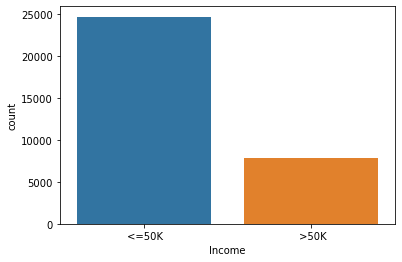

In [17]:
# Checking the counts of label categories
income = df['Income'].value_counts(normalize=True)
print(round(income * 100, 2).astype('str') + ' %')
sns.countplot(df['Income'])

Data is imbalanced so we have to fix this

## EDA

In [18]:
dfcorr=df.corr()

<AxesSubplot:>

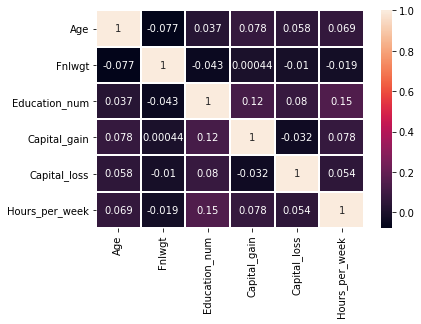

In [19]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

 Male      21789
 Female    10771
Name: Sex, dtype: int64


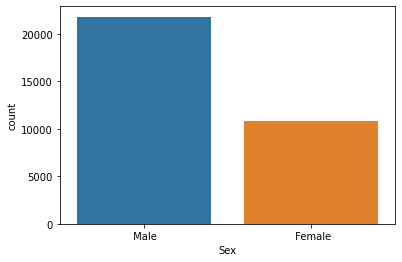

In [20]:
sns.countplot(x=df['Sex'],data=df)
print(df['Sex'].value_counts())

<AxesSubplot:xlabel='Age', ylabel='count'>

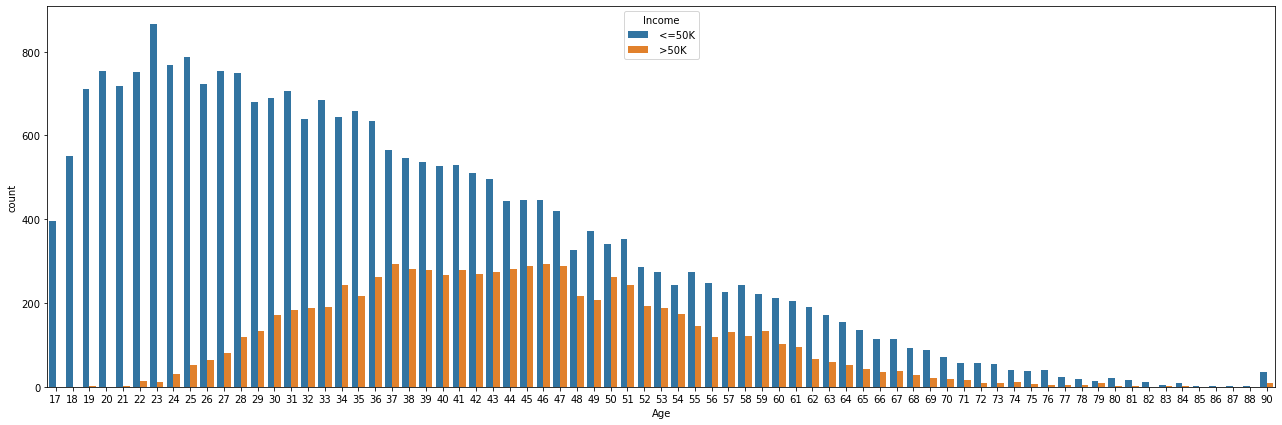

In [21]:
plt.figure(figsize=(22,7))
sns.countplot(x='Age',hue='Income',data=df)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

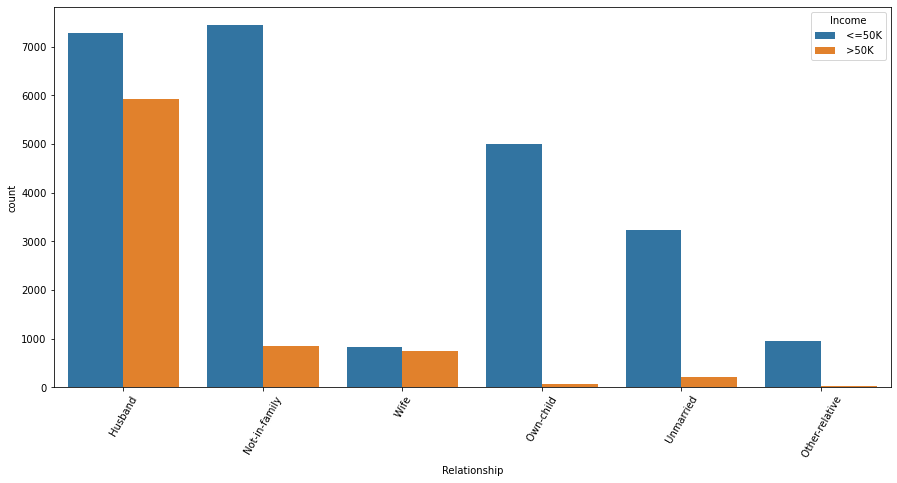

In [22]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=60)

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


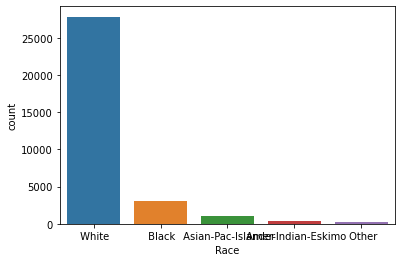

In [23]:
sns.countplot(x=df['Race'],data=df)
print(df['Race'].value_counts())

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


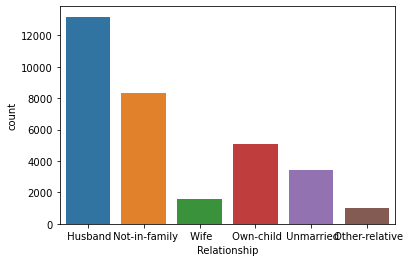

In [24]:
sns.countplot(x=df['Relationship'],data=df)
print(df['Relationship'].value_counts())

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


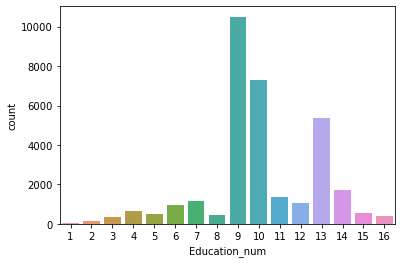

In [25]:
sns.countplot(x=df['Education_num'],data=df)
print(df['Education_num'].value_counts())

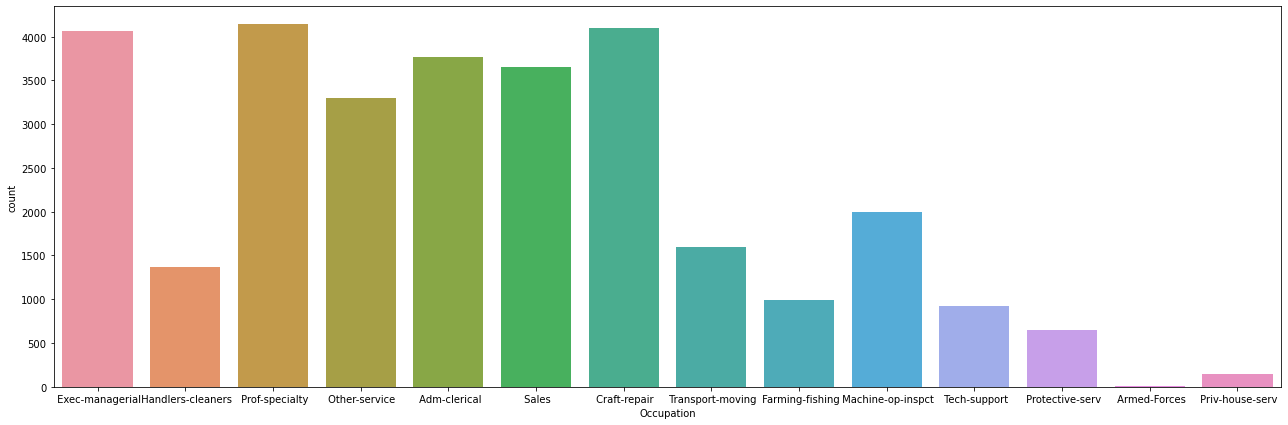

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


In [26]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Occupation'],data=df)
plt.show()
print(df['Occupation'].value_counts())

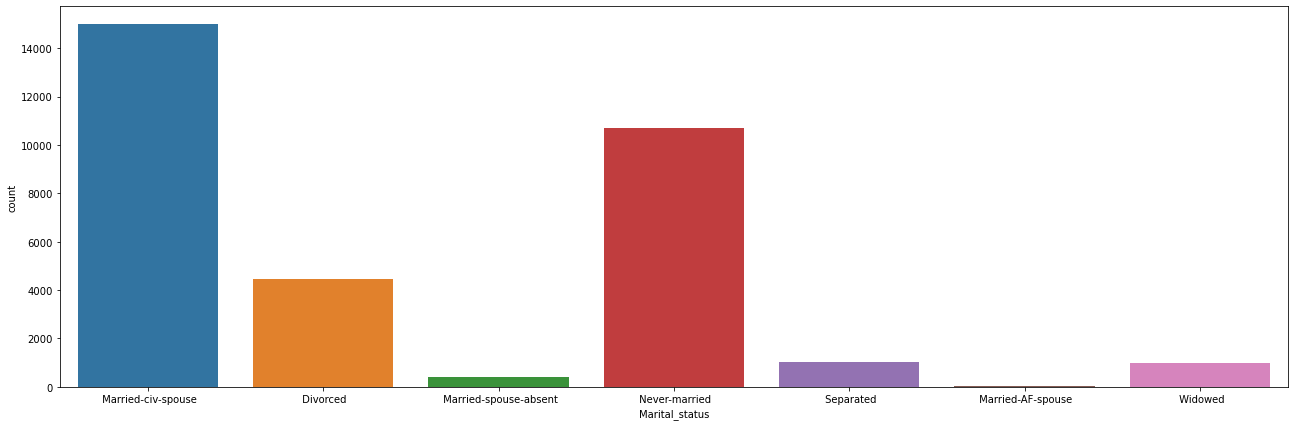

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


In [27]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Marital_status'],data=df)
plt.show()
print(df['Marital_status'].value_counts())

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

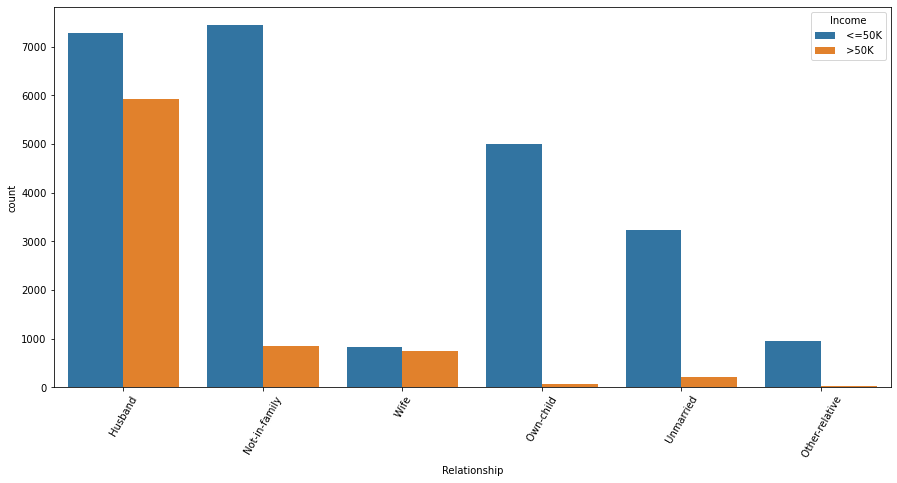

In [28]:
plt.figure(figsize=(15,7))
sns.countplot(x='Relationship',hue='Income',data=df)
plt.xticks(rotation=60)


- Only in Husband we see we have almost 6000 people have more than 50k income
- All in other ralation we have most of people less than 50k income

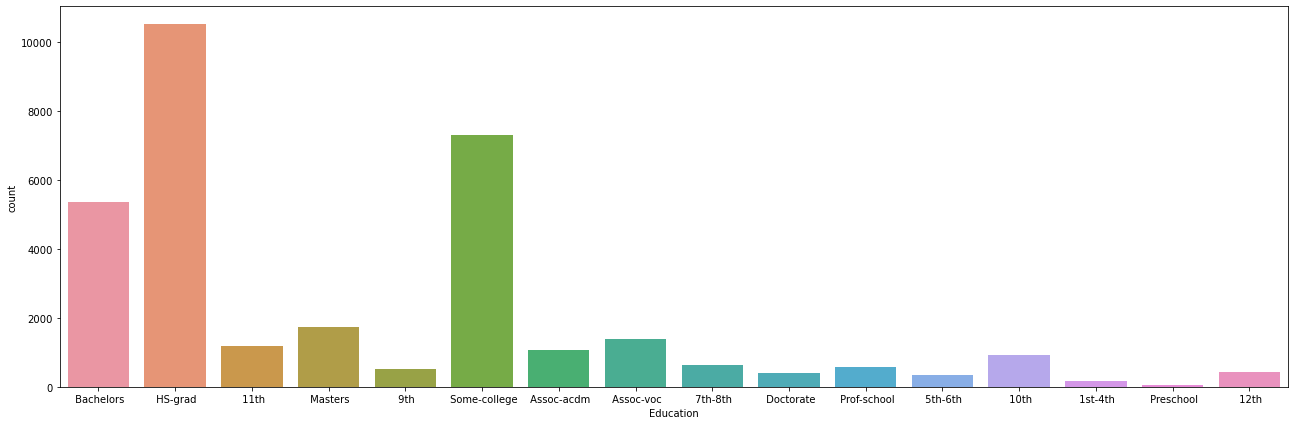

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


In [30]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Education'],data=df)
plt.show()
print(df['Education'].value_counts())

- Education is having high impact on income
- People who have done HS-grad have less than 50k
- People who have passed only till 11th, amongst those very few of them have more than 50k
- Doctorate and Prof-school most of the people have more than 50k and in all other categories, most of people have less than 50k

In [31]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

## Removing null values

In [33]:
df['Workclass']=df['Workclass'].fillna(method='ffill')

In [34]:
df['Occupation']=df['Occupation'].fillna(method='ffill')

In [35]:
df['Native_country']=df['Native_country'].fillna(method='ffill')

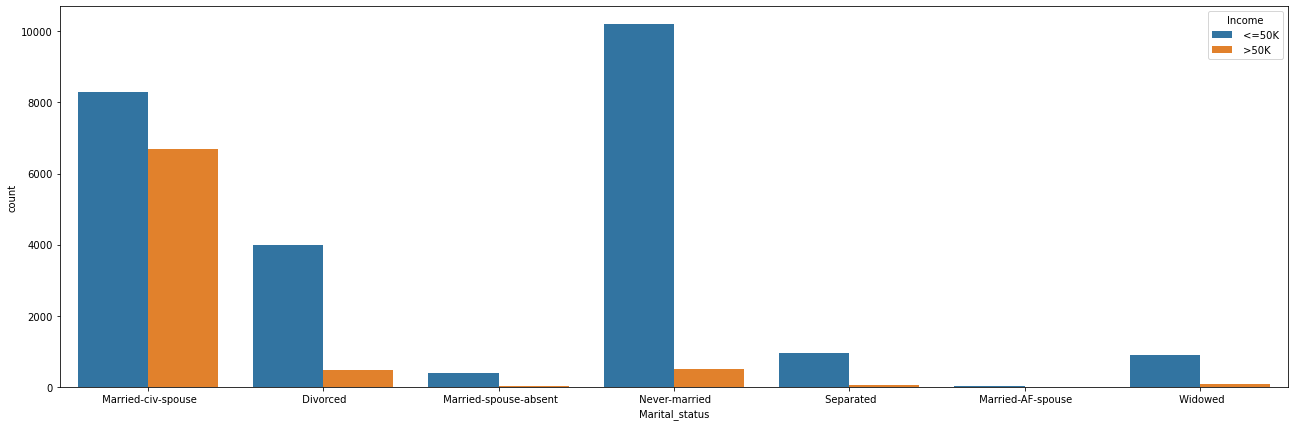

In [36]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Marital_status'],hue='Income',data=df)
plt.show()

- People under married-civ-spouse category have most incomes above 50000 compared to the rest
- People under Never-married category have most incomes below 50000 compared to the rest

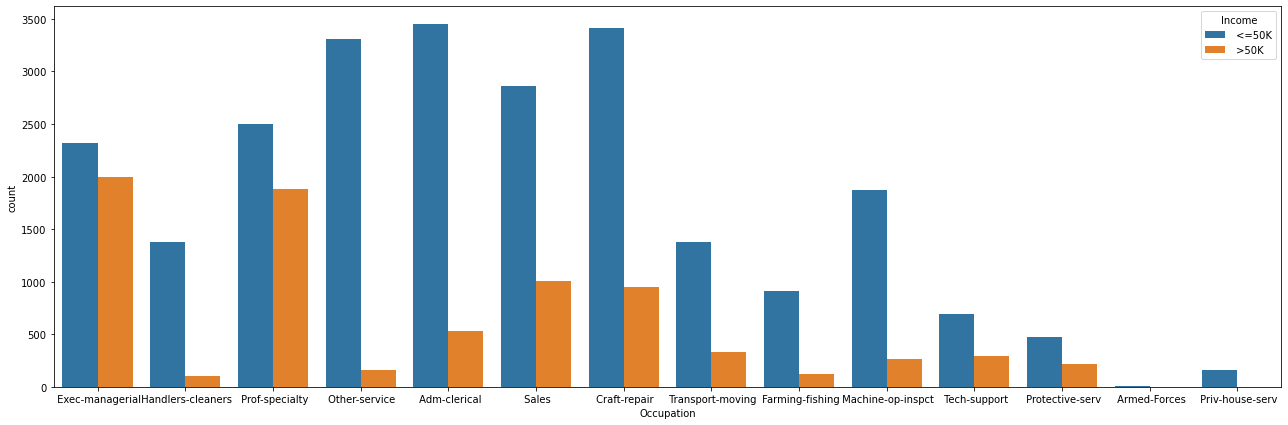

In [37]:
plt.figure(figsize=(22,7))
sns.countplot(x=df['Occupation'],hue='Income',data=df)
plt.show()

Most of the Adm-clerical and Craft-repair are having income less than 50000

<AxesSubplot:xlabel='Relationship', ylabel='count'>

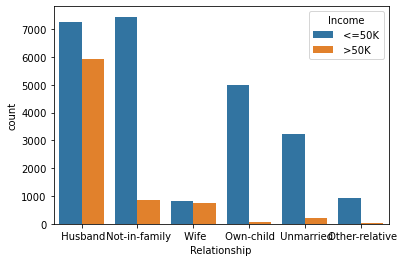

In [38]:
sns.countplot(x=df['Relationship'],hue='Income',data=df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

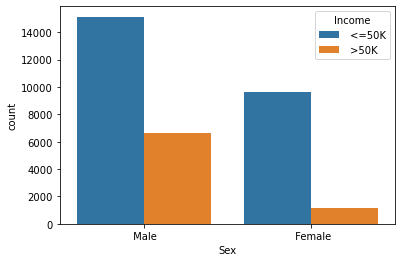

In [39]:
sns.countplot(x=df['Sex'],hue='Income',data=df)

## Using Label Encoder for convering categorical to numerical 

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [41]:
categ_columns=['Workclass','Education','Marital_status','Occupation','Ralationship','Race','Sex','Native_country','Income']

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
 14  Income          32560 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


In [45]:
df.head(20)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
5,49,3,160187,6,5,3,7,1,2,0,0,0,16,22,0
6,52,5,209642,11,9,2,3,0,4,1,0,0,45,38,1
7,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38,1
8,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38,1
9,37,3,280464,15,10,2,3,0,2,1,0,0,80,38,1


In [46]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.101689,1.897818e+05,10.298249,10.080590,2.611794,5.966523,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.380620,0.240817
std,13.640642,1.136176,1.055498e+05,3.870317,2.572709,1.506225,4.025761,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,6.128967,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.178315e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,3.000000,1.783630e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,48.000000,3.000000,2.370545e+05,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,7.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


## Skewness handling

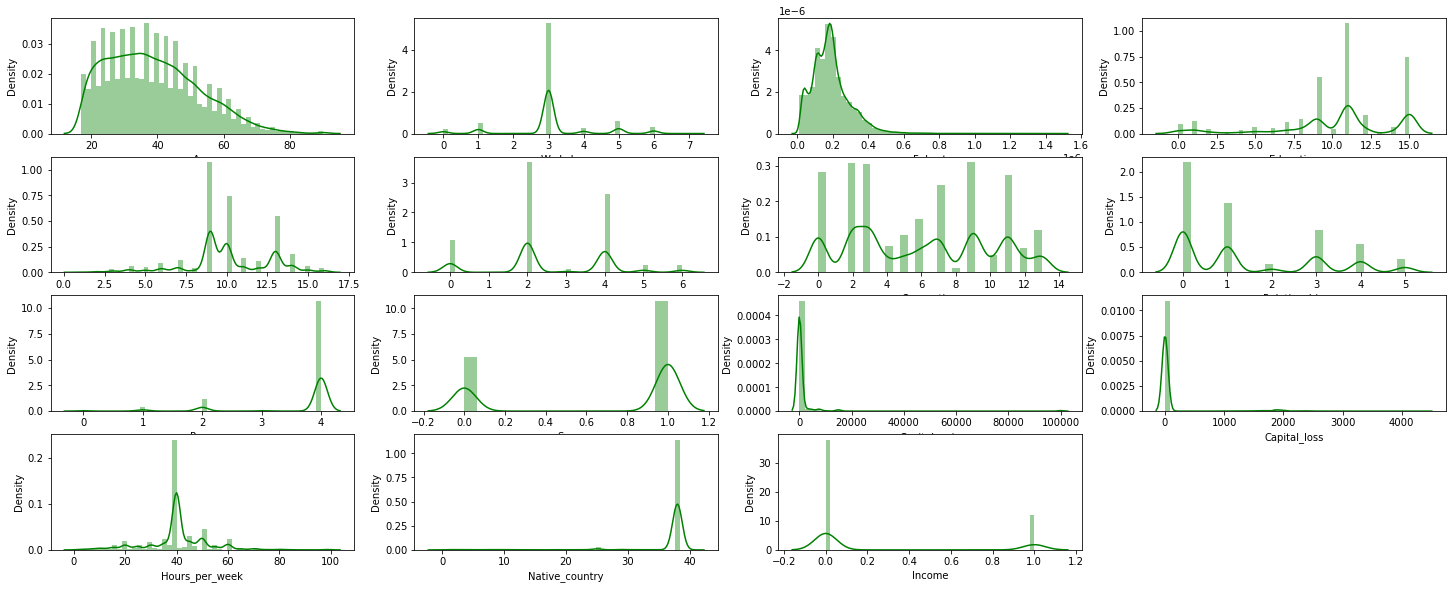

In [47]:
plt.figure(figsize=(25,20))
for i in enumerate(df.columns):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [48]:
df.skew()

Age                0.558738
Workclass          0.066233
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.109217
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.188599
Income             1.212383
dtype: float64

- Skewness more than+/- 0.5 will we treated
- We can see here most of the columns are skewed

In [49]:
from sklearn.preprocessing import power_transform

df[['Age','Fnlwgt','Capital_gain','Capital_loss']]=power_transform(
    df[['Age','Fnlwgt','Capital_gain','Capital_loss']])

In [50]:
df.skew()

Age              -0.013897
Workclass         0.066233
Fnlwgt            0.016914
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.109217
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.227636
Native_country   -4.188599
Income            1.212383
dtype: float64

## Outliers

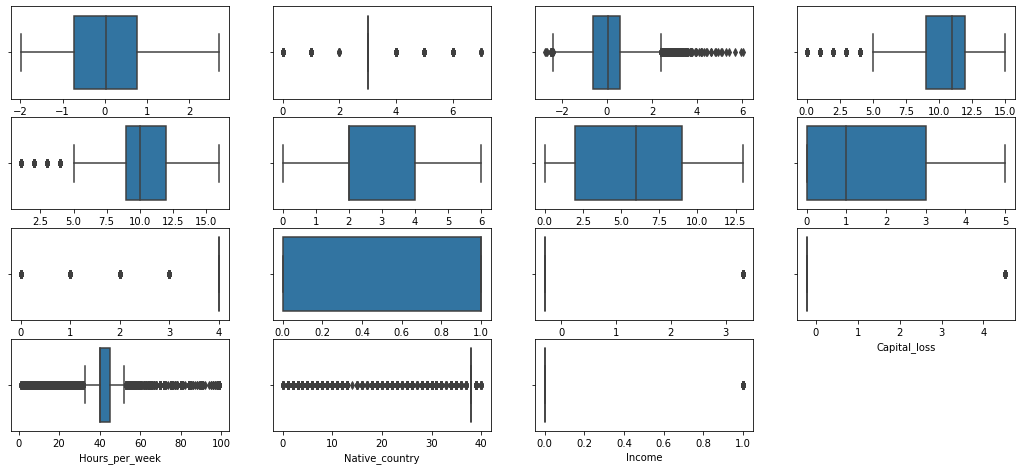

In [52]:
plt.figure(figsize=(18,18))
for o in enumerate(df):
    plt.subplot(9,4,o[0]+1)
    sns.boxplot(df[o[1]])

In [53]:
#outlier removal
from scipy.stats import zscore

z=np.abs(zscore(df))

print(np.where(z>3))

(array([    3,     7,     8, ..., 32550, 32552, 32559], dtype=int64), array([13, 10, 10, ...,  8,  8, 10], dtype=int64))


In [54]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (32560, 15)
After removing outliers:: (25743, 15)


In [55]:
#IQR
from scipy import stats 
IQR = stats.iqr(df) 
IQR

9.0

In [56]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(24821, 15)


In [57]:
df=df_1

In [58]:
df.shape

(25743, 15)

## Independent and Dependent variable

In [59]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [60]:
x.shape

(25743, 14)

In [61]:
y.shape

(25743,)

In [62]:
#scaling values
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)


In [63]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [64]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,25743.000000,25743.000000,25743.000000,25743.000000,25743.000000,25743.000000,25743.000000,25743.000000,25743.000000,25743.000000,25743.0,25743.0,25743.000000,25743.000000
mean,0.410959,0.515253,0.455094,0.687610,0.537389,0.441291,0.456010,0.300175,0.891738,0.655091,0.0,0.0,0.488375,0.886336
std,0.213559,0.187145,0.178185,0.261665,0.184613,0.255926,0.311479,0.319257,0.307639,0.475348,0.0,0.0,0.153111,0.115910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,0.248293,0.500000,0.345152,0.600000,0.461538,0.333333,0.153846,0.000000,1.000000,0.000000,0.0,0.0,0.479452,0.909091
50%,0.413877,0.500000,0.467127,0.733333,0.538462,0.333333,0.461538,0.200000,1.000000,1.000000,0.0,0.0,0.493151,0.909091
75%,0.575094,0.500000,0.560185,0.800000,0.692308,0.666667,0.692308,0.600000,1.000000,1.000000,0.0,0.0,0.561644,0.909091
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000


## Imbalanced learn
- Using OverSamling_BorderlineSMOTE  because there is less data in attrition for yes

<AxesSubplot:xlabel='Income', ylabel='count'>

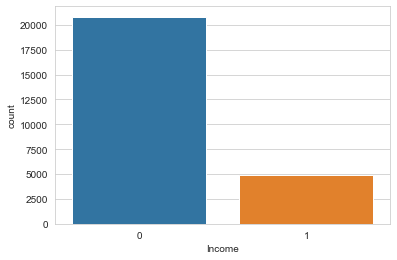

In [65]:
sns.set_style("whitegrid")
sns.countplot(x="Income", data=df)

In [66]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (25743,)
Resample Target dataset shape (41622,)


<AxesSubplot:xlabel='Income', ylabel='count'>

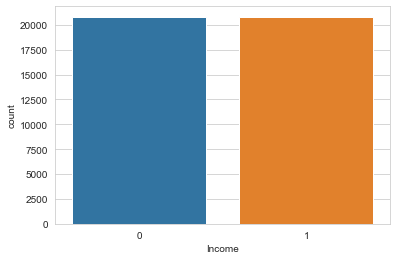

In [67]:
sns.set_style("whitegrid")
sns.countplot(y_rus)

## Spliting Train and Test data

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)


In [70]:
x_train.shape

(30384, 14)

In [71]:
x_test.shape

(11238, 14)

In [72]:
y_train.shape

(30384,)

In [73]:
y_test.shape

(11238,)

## Model building

In [74]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')



### Logistic Regression

In [75]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.7438852191932441


In [76]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.7504004271222637
[[3868 1688]
 [1117 4565]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.73      5556
           1       0.73      0.80      0.76      5682

    accuracy                           0.75     11238
   macro avg       0.75      0.75      0.75     11238
weighted avg       0.75      0.75      0.75     11238

Training accuracy:: 0.7421011058451816
Test accuracy:: 0.7504004271222637


### Decision Tree Classifier

In [77]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.8377577048456434


In [78]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.8512190781277807
[[4705  851]
 [ 821 4861]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      5556
           1       0.85      0.86      0.85      5682

    accuracy                           0.85     11238
   macro avg       0.85      0.85      0.85     11238
weighted avg       0.85      0.85      0.85     11238

Training accuracy:: 0.9999670879410216
Test accuracy:: 0.8512190781277807


### K Neighbors Classifier

In [79]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.8613240342697335


In [80]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.8618081509165332
[[4197 1359]
 [ 194 5488]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.84      5556
           1       0.80      0.97      0.88      5682

    accuracy                           0.86     11238
   macro avg       0.88      0.86      0.86     11238
weighted avg       0.88      0.86      0.86     11238

Training accuracy:: 0.894845971563981
Test accuracy:: 0.8618081509165332


### Random Forest Classifier

In [81]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8932317276430684


In [82]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.898291510945008
[[4791  765]
 [ 378 5304]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      5556
           1       0.87      0.93      0.90      5682

    accuracy                           0.90     11238
   macro avg       0.90      0.90      0.90     11238
weighted avg       0.90      0.90      0.90     11238

Training accuracy:: 0.9999012638230648
Test accuracy:: 0.898291510945008


### ADA Boost Classifier

In [83]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.8339112970110477


In [84]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.8341341875778608
[[4372 1184]
 [ 680 5002]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.82      5556
           1       0.81      0.88      0.84      5682

    accuracy                           0.83     11238
   macro avg       0.84      0.83      0.83     11238
weighted avg       0.84      0.83      0.83     11238

Training accuracy:: 0.8359333859926277
Test accuracy:: 0.8341341875778608


### Gradient Boosting Classifier

In [85]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x_rus,y_rus,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8528922559011949


In [86]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8546004627157857
[[4330 1226]
 [ 408 5274]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      5556
           1       0.81      0.93      0.87      5682

    accuracy                           0.85     11238
   macro avg       0.86      0.85      0.85     11238
weighted avg       0.86      0.85      0.85     11238

Training accuracy:: 0.857161664033702
Test accuracy:: 0.8546004627157857


 RandomForestClassifier is the best model

### Hyper parameter tuning

In [87]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,1000,50],
    'min_samples_split':[2,3,4],
     'random_state':[10]              
}

In [88]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [91]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 18 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:  3.2min finished


Accuracy after parameter tuning:: 0.8996262680192205


In [92]:
rfc_grid.best_params_

{'criterion': 'entropy',
 'min_samples_split': 3,
 'n_estimators': 1000,
 'random_state': 10}

## Model Training

In [93]:
best_param={
    'criterion' : ['entropy'],
    'n_estimators':[1000],
    'min_samples_split':[4],
     'random_state':[10]    }

In [94]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [95]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   33.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   33.9s finished


Accuracy after parameter tuning:: 0.9014059441181705


In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
print("roc auc score::",roc_auc_score(y_test, best_rfc_pred))

roc auc score:: 0.9009824514989171


In [98]:
from sklearn.metrics import roc_curve

In [99]:
fpr1, tpr1, thresh1 = roc_curve(y_test, best_rfc_pred, pos_label=1)

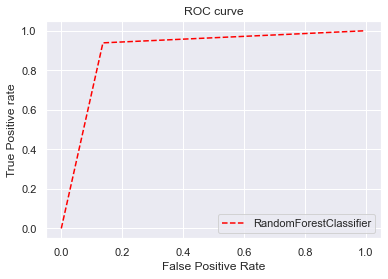

In [100]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='RandomForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Saving the model

In [101]:
import joblib

In [102]:
joblib.dump(rfc,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']